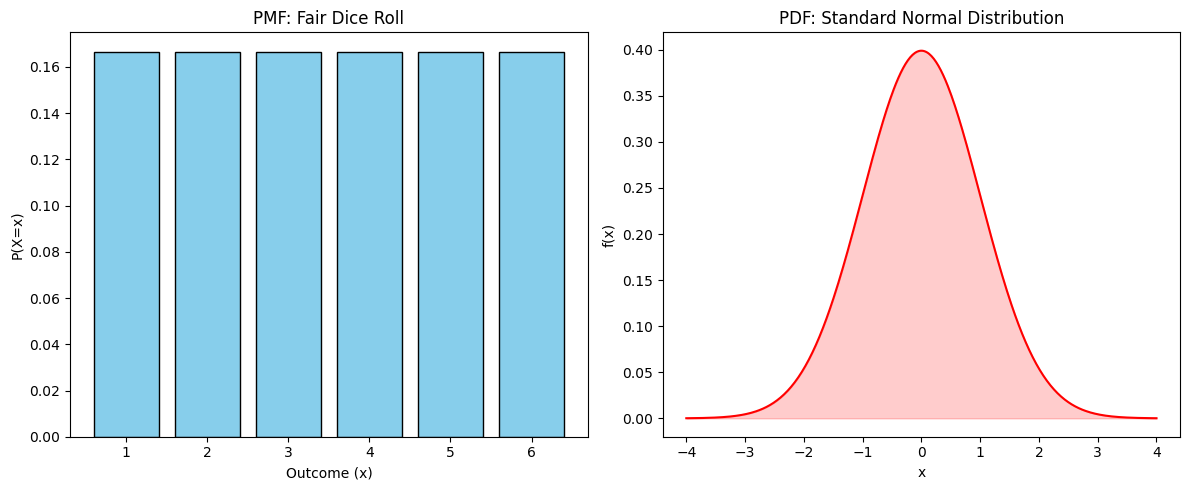

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# PMF Example: Fair Dice Roll
dice_outcomes = np.arange(1, 7)
pmf_values = np.full(6, 1/6)

# PDF Example: Standard Normal Distribution
x = np.linspace(-4, 4, 400)
pdf_values = norm.pdf(x, 0, 1)

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# PMF Plot (Dice)
axs[0].bar(dice_outcomes, pmf_values, color='skyblue', edgecolor='black')
axs[0].set_title("PMF: Fair Dice Roll")
axs[0].set_xlabel("Outcome (x)")
axs[0].set_ylabel("P(X=x)")
axs[0].set_xticks(dice_outcomes)

# PDF Plot (Normal Distribution)
axs[1].plot(x, pdf_values, color='red')
axs[1].fill_between(x, pdf_values, alpha=0.2, color='red')
axs[1].set_title("PDF: Standard Normal Distribution")
axs[1].set_xlabel("x")
axs[1].set_ylabel("f(x)")

plt.tight_layout()
plt.show()


452 200.0 0.0


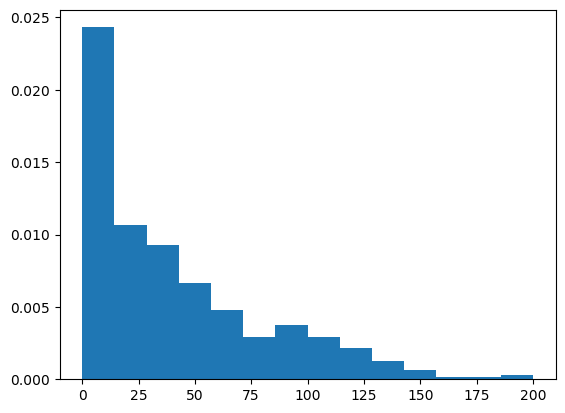

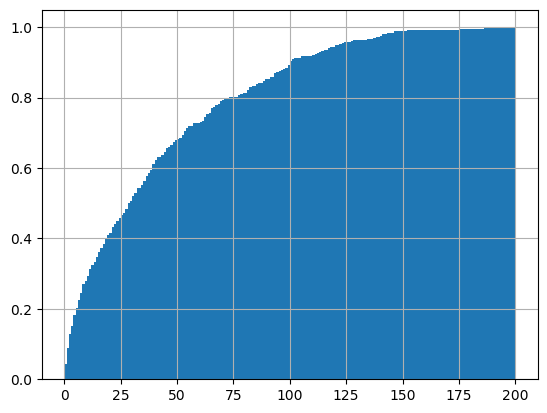

In [24]:
import numpy as np
import matplotlib.pyplot as plt


# Load scores
scores = np.loadtxt("data/sachin.txt")

print(len(scores), max(scores), min(scores))

plt.hist(scores, bins='auto', density=True)
plt.show()


c, b, p = plt.hist(scores, bins=range(201), density=True, cumulative=True);
plt.grid();

plt.show()

# --- Functions using numpy only ---

def compute_pmf(data):
    unique, counts = np.unique(data, return_counts=True)
    pmf = counts / len(data)
    return unique, pmf

def compute_cdf(pmf):
    return np.cumsum(pmf)

def probability_in_range(unique, pmf, a, b):
    mask = (unique >= a) & (unique <= b)
    return pmf[mask].sum()

# --- Calculate PMF and CDF ---
unique_scores, pmf_values = compute_pmf(scores)
cdf_values = compute_cdf(pmf_values)

# --- Summary statistics ---
median_score = np.median(scores)
q1 = np.percentile(scores, 25)
q3 = np.percentile(scores, 75)
iqr = q3 - q1

# --- Probabilities ---
prob_less_10 = probability_in_range(unique_scores, pmf_values, 0, 9)
prob_more_50 = probability_in_range(unique_scores, pmf_values, 51, scores.max())
prob_more_100 = probability_in_range(unique_scores, pmf_values, 101, scores.max())
conditional_prob = prob_more_100 / prob_more_50 if prob_more_50 > 0 else np.nan

# # --- Print Results ---
# print("Median score:", median_score)
# print("IQR:", iqr)
# print("P(X < 10):", prob_less_10)
# print("P(X > 50):", prob_more_50)
# print("P(X > 100 | X > 50):", conditional_prob)

# # --- Plot PMF ---
# plt.figure(figsize=(12, 5))
# plt.bar(unique_scores, pmf_values, width=2, alpha=0.7, color="blue")
# plt.title("PMF (Probability Mass Function) of Sachin's Scores")
# plt.xlabel("Runs Scored")
# plt.ylabel("Probability")
# plt.grid(True, linestyle="--", alpha=0.5)
# plt.show()

# # --- Plot CDF ---
# plt.figure(figsize=(12, 5))
# plt.step(unique_scores, cdf_values, where="post", color="red")
# plt.title("CDF (Cumulative Distribution Function) of Sachin's Scores")
# plt.xlabel("Runs Scored")
# plt.ylabel("Cumulative Probability")
# plt.grid(True, linestyle="--", alpha=0.5)
# plt.show()


# Interpretation of Results

# PMF: gives probability of each exact score.

# CDF: cumulative sum of PMF, i.e., probability that 𝑋≤𝑥.

# Median score: the middle score = ~28.5.

# IQR: ~55.0 (spread between Q3 and Q1).

# P(X < 10): ~27.9% chance Sachin scores <10.

# P(X > 50): ~31.6% chance he scores more than 50.

# P(X > 100 | X > 50): ~30% chance he crosses 100 given he already crossed 50.


In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Load Sachin's scores again
scores = np.loadtxt("data/sachin.txt")

def cdf_from_hist(data, x):
    """
    Compute CDF P(X <= x) using matplotlib's histogram return values.
    """
    c, b, _ = plt.hist(data, bins=range(int(data.max())+2), density=True, cumulative=True)
    plt.close()  # Prevents showing the histogram
    
    # Find the cumulative probability corresponding to bin <= x
    idx = np.searchsorted(b[:-1], x, side="right") - 1
    if idx < 0:
        return 0.0
    elif idx >= len(c):
        return 1.0
    else:
        return c[idx]

# Examples of usage
p_leq_10 = cdf_from_hist(scores, 10)
p_leq_50 = cdf_from_hist(scores, 50)
p_leq_100 = cdf_from_hist(scores, 100)

(p_leq_10, p_leq_50, p_leq_100)


	# •	Functionality: The function uses a histogram-based CDF to determine the percentage of matches that fall below a certain value.
	# •	Example Probabilities: P(X≤10) ≈ 0.292, P(X≤50) ≈ 0.684, and P(X≤100) ≈ 0.905.
	# •	Interpretation: These probabilities represent the proportion of matches that are less than or equal to 10, 50, and 100, respectively.

#CDF values directly from the histogram bins

p_leq_10 = cdf_from_hist(scores, 10)
p_leq_50 = cdf_from_hist(scores, 50)
p_leq_100 = cdf_from_hist(scores, 100)

print("P(X <= 10):", p_leq_10)
print("P(X <= 50):", p_leq_50)
print("P(X <= 100):", p_leq_100)




def prob_in_range(data, a, b):
    """
    Compute P(a <= X <= b) using the CDF values.
    """
    return cdf_from_hist(data, b) - cdf_from_hist(data, a-1)

# Examples
p_range_30_70 = prob_in_range(scores, 30, 70)
p_range_0_10 = prob_in_range(scores, 0, 10)
p_range_100_200 = prob_in_range(scores, 100, 200)

print(p_range_30_70, p_range_0_10, p_range_100_200)

p_range_30_70 = prob_in_range(scores, 30, 70)
p_range_0_10 = prob_in_range(scores, 0, 10)
p_range_100_200 = prob_in_range(scores, 100, 200)

print("P(30 <= X <= 70):", p_range_30_70)
print("P(0 <= X <= 10):", p_range_0_10)
print("P(100 <= X <= 200):", p_range_100_200)

P(X <= 10): 0.29203539823008856
P(X <= 50): 0.6836283185840708
P(X <= 100): 0.904867256637167
0.287610619469026 0.29203539823008856 0.1084070796460167
P(30 <= X <= 70): 0.287610619469026
P(0 <= X <= 10): 0.29203539823008856
P(100 <= X <= 200): 0.1084070796460167
